In [1]:
import numpy as np
#from scipy.stats import multivariate_normal
from scipy.stats import norm
import scipy
import math
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


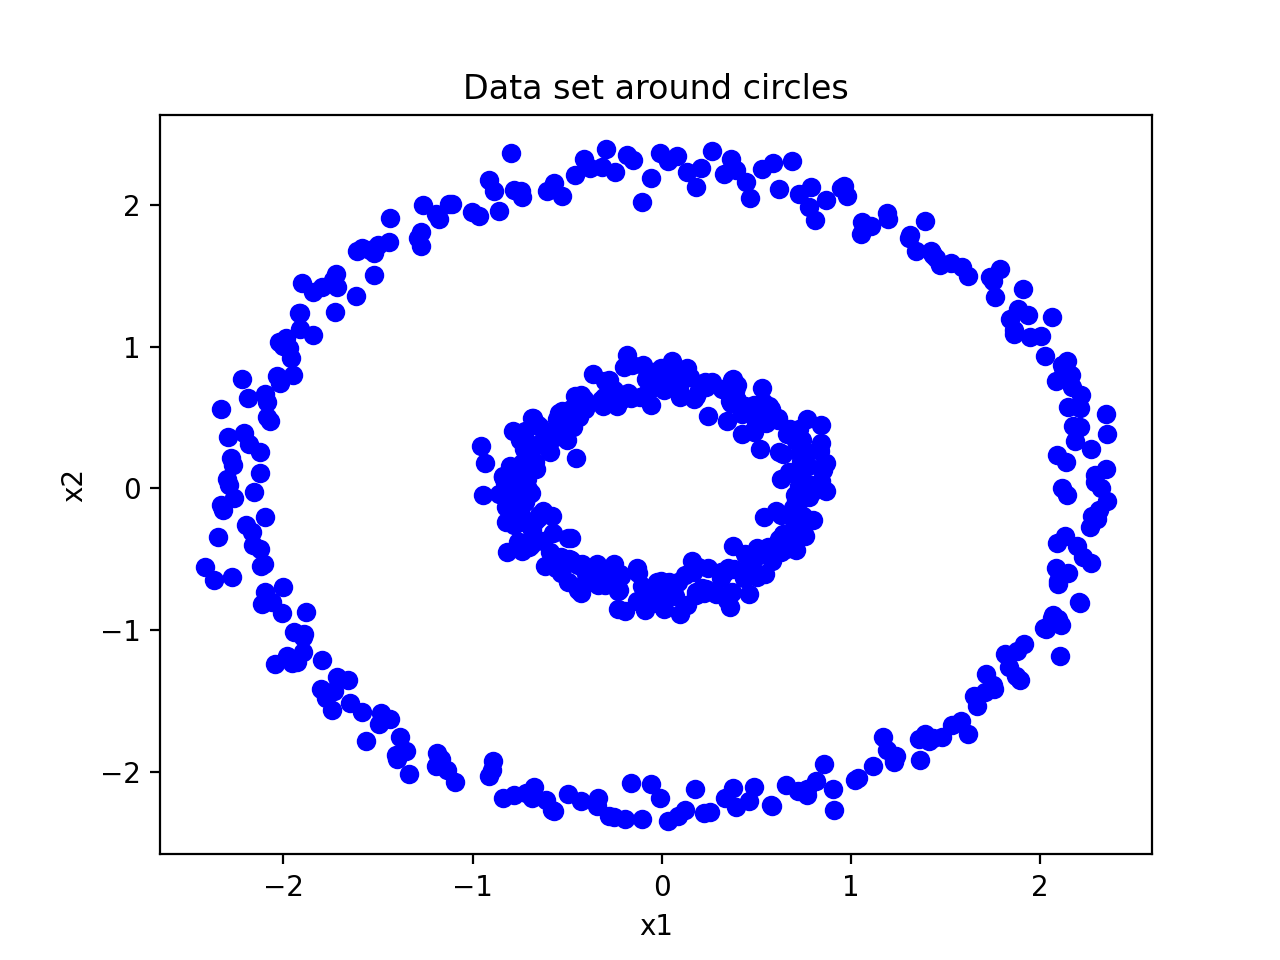

In [2]:
### generate data
def circle(n,r):
    angle = np.linspace( 0 , 2 * np.pi , n ) 
    radius = r
 
    #Points = multivariate_normal.rvs(mean=[radius]*2,scale = np.diag([1/2,1/2]),size=1 )    
    x = norm.rvs(loc=radius,scale=1/10, size=len(angle)) * np.cos( angle ) 
    y = norm.rvs(loc=radius,scale=1/10, size=len(angle))* np.sin( angle ) 
    Points = np.stack((x, y), axis=1)
    
    return(Points)

Points1 = circle(300,0.75)
Points2 = circle(300,2.25)

plt.figure()
plt.scatter( Points1[:,0], Points1[:,1], c='b' ) 
plt.scatter( Points2[:,0], Points2[:,1],c ='b' ) 

 
plt.title( 'Data set around circles' ) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [21]:
###implement kernel PCA
### squared exponential kernel
def kernel(x1, x2, sigma= 0.25):##0.25,1.5, 2.5
    diff = np.subtract(x1,x2)
    return (np.exp(-diff.dot(diff)/(sigma**2)))
###Gram matrix: loop
data = np.concatenate((Points1, Points2), axis=0)
dim = data.shape[0]
K = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        x1 = data[i,:]
        x2 = data[j,:]
        K[i,j] = kernel(x1,x2)
###centered K
one = np.full([dim,dim],1/dim) 
K_c = K-one.dot(K)-K.dot(one)+one.dot(K).dot(one)
###kernel PCA
## Since K.shape[0] << the number of components needed, we implement the truncated SVD(i.e.,scipy.sparse.linalg.eigsh)
eigen_values, eigen_vectors = scipy.sparse.linalg.eigsh(K_c) #The eigenvalues in ascending order
eigen_values = eigen_values[::-1] # Ranking eigenvalues in decreasing order
eigen_vectors = eigen_vectors[:,::-1]
Y = np.zeros((dim,3))
for s in range(0,3):
    Y[:,s] = K_c.dot(eigen_vectors[:,s])/math.sqrt(eigen_values[s])

<IPython.core.display.Javascript object>


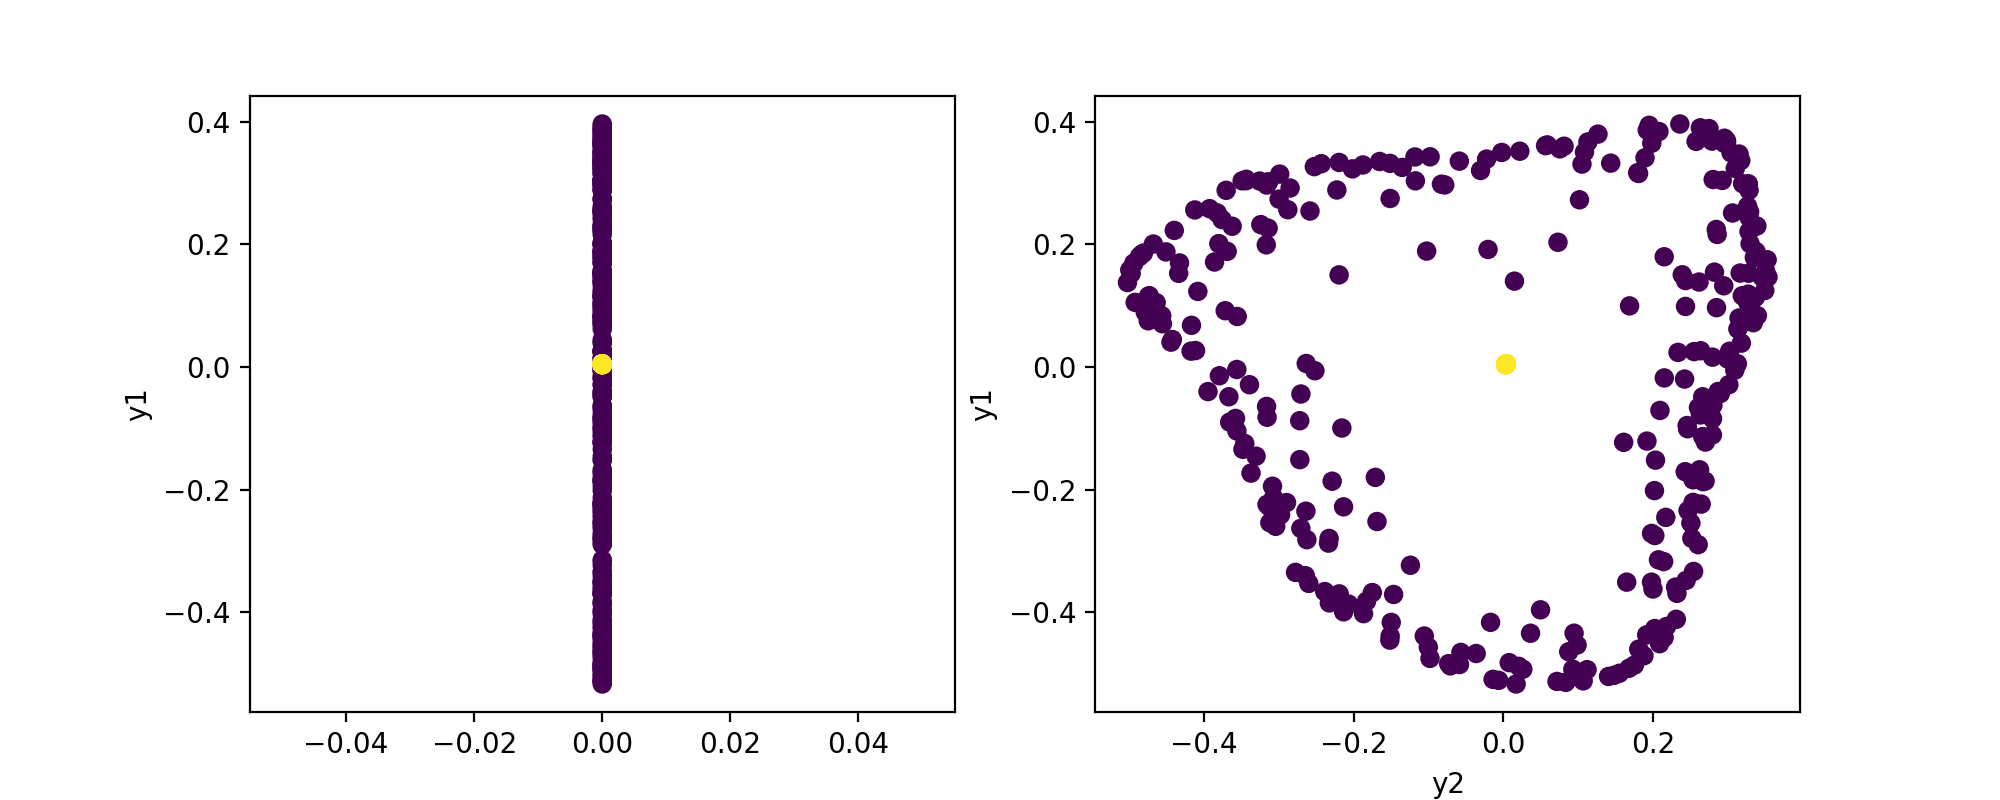

Text(0.5, 0, 'y2')

In [22]:
y = np.concatenate(([0]*int(dim/2),[1]*int(dim/2)),axis=0)
### 1-d plot
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 2, 1)#, projection='3d')
ax.scatter([0]*int(dim), Y[:,0] ,c= y)
ax.set_ylabel('y1')

###2-d plot
ax = fig.add_subplot(1, 2, 2)
ax.scatter(Y[:,1],Y[:,0] ,c = y)
ax.set_ylabel('y1')
ax.set_xlabel('y2')

<IPython.core.display.Javascript object>


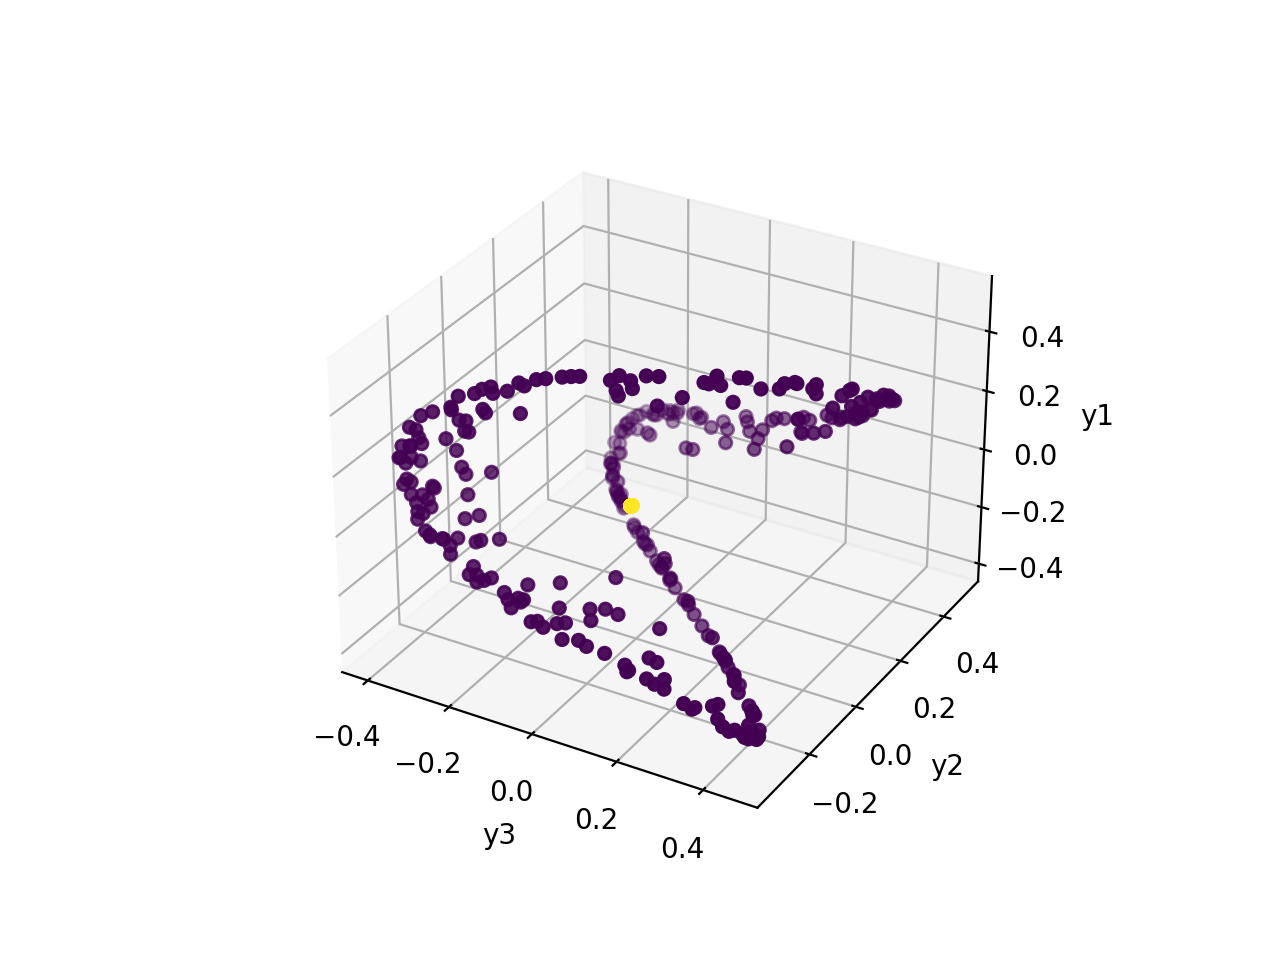

In [26]:
###3-d plot
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Y[:,2],Y[:,1],Y[:,0],c = y)
#ax.scatter(Y[:,2],-Y[:,1],-Y[:,0],c = y)

ax.set_xlabel('y3')
ax.set_ylabel('y2')
ax.set_zlabel('y1')
plt.show()

<IPython.core.display.Javascript object>


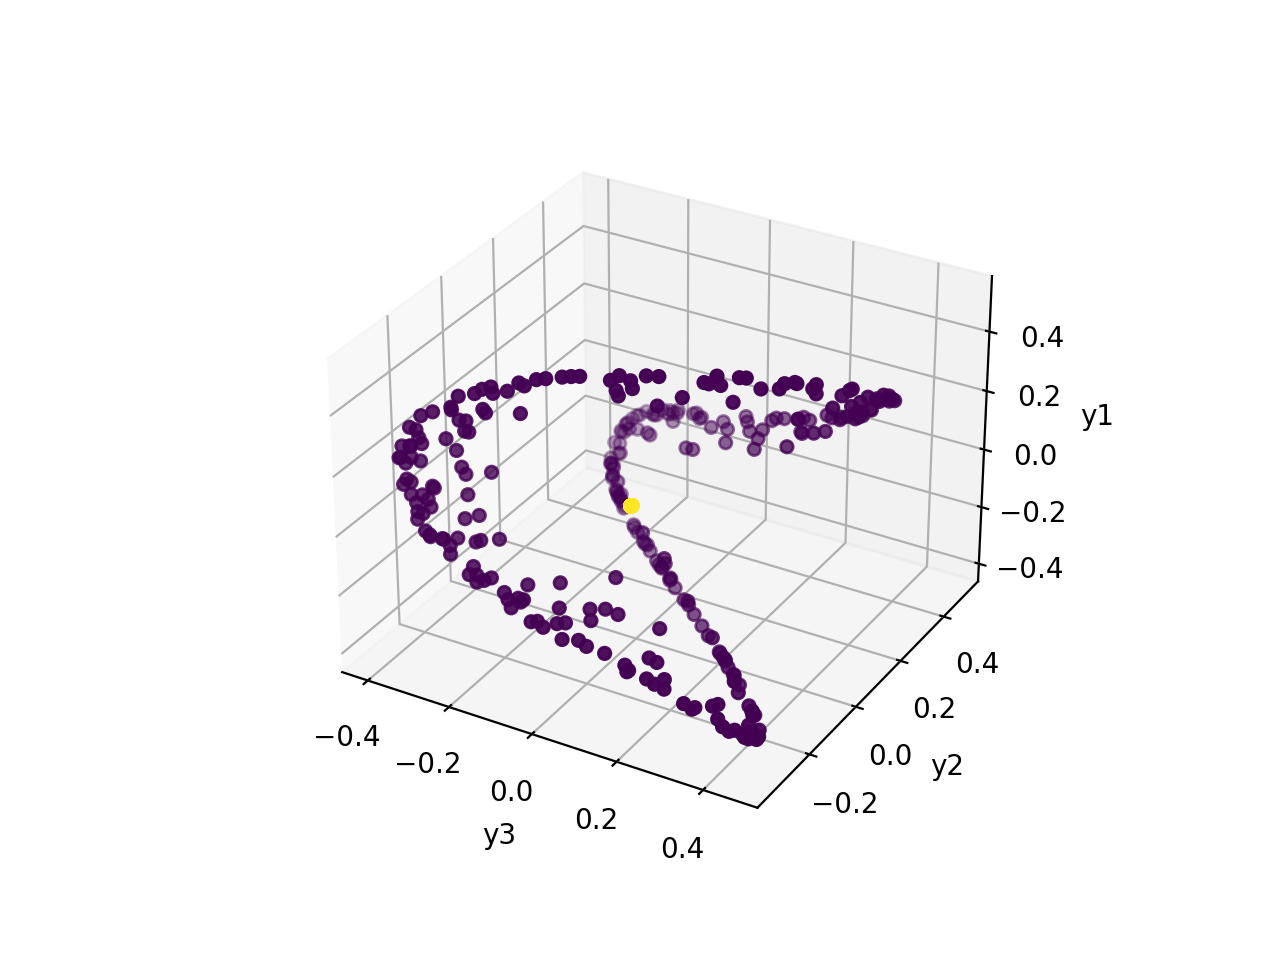

Text(0.5, 0, 'y1')

In [11]:
from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="rbf",  gamma=1/(0.25)**2) # gamma = inverse of sigma^2
X_kpca = kpca.fit(data).transform(data)
plt.figure()
f2 = plt.axes(projection='3d')
f2.scatter(X_kpca[:, 2], X_kpca[:, 1],X_kpca[:, 0],c = y)

f2.set_xlabel('y3')
f2.set_ylabel('y2')
f2.set_zlabel('y1')